# Create organic alkalinity with citric acid (citrate)

In [178]:
# use a database with some organic molecules 

# therefor the database needs to be installed first and then put in the phreeqpython folder


#print(phreeqpython.__path__)

#check this path and put the  'minteq.v4.dat'  file in there 

# https://github.com/Vitens/phreeqpython/issues/2


In [179]:
#titration plots for different solutions


from phreeqpython import PhreeqPython 

import numpy as np


from matplotlib import pyplot as plt

import pandas as  pd


#produce a solution with NaOH one in equilibrium with atmophere and the other one pure


# use the vitens database for all constants







# geneal phreeqc info

Note your input is  mol/L, so the density may be important. PHREEQC will
use the density to converting to mol/kgw, which are the units used for all
internal calculations (and all printout). Right now the density is 1.0.

In [180]:
# some unecessary style settings

plt.rcParams.update({'font.size': 22,
                     #font.weight':'bold',
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'lines.linewidth' :  4,
                     'axes.labelsize'  : 20.0,
                     'axes.titlesize':  20,
                     'figure.titlesize': 'x-large',
                     'legend.fontsize': 18.0,})



In [181]:
# Complex, allowing for more 'standard' PHREEQC input (Phreeqc example 3 -- Mixing)
solution2 = pp.add_solution({'units':'ppm',
                                 'pH': 8.22,
                                 'pe': 8.451,
                                 'density': 1.023,
                                 'temp': 25.0,
                                 'Ca': 412.3,
                                 'Mg': 1291.8,
                                 'Na': 10768.0,
                                 'K': 399.1,
                                 'Si': 4.28,
                                 'Cl': 19353.0,
                                 'Alkalinity': '141.682 as HCO3',
                                 'S(6)': 2712.0
                                })

In [182]:
#produce a solution with NaOH one in equilibrium with atmophere and the other one pure


# use the vitens database for all constants

# create new PhreeqPython instance

pp = PhreeqPython(database='minteq.v4.dat')

#for differnt NaOH doses

temp=25

#concetration 50mmol/l 0.05mol/l
c=10

c_citrate=3

# Line 5: units concentration units

#units--Indicates default concentration units are entered on this line. Optionally, -u[ nits].

#concentration units --Default concentration units. Three groups of concentration units are allowed, concentration (1) per liter ("/L"), (2) per kilogram solution ("/kgs"), or (3) per kilogram water ("/kgw"). All concentration units for a solution must be within the same group. Within a group, either grams or moles may be used, and prefixes milli (m) and micro (u) are acceptable. Parts per thousand, "ppt"; parts per million, "ppm"; and parts per billion, "ppb", are acceptable in the "per kilogram solution" group. Default is mmol/kgw (millimoles per kilogram water).


# set the Sodium moles and produce charge balance for oH-

solution1=pp.add_solution_simple({'NaOH':c},temperature=temp, units='mmol')



#concentration CO2
p=415 # ppm

#partial pressure pCO2 in atm
pCO2=p*1e-6 


#phreeqc always uses log10 values
input_pCO2=np.log10(pCO2)
    
    
# equalize solution with CO2
# equilibrium with atmosphere
solution1.equalize(['CO2(g)'], [input_pCO2])


#take just a part of this solution



solution2=pp.add_solution_simple({'NaOH':c},temperature=temp, units='mmol')


#create a third solution with some organic acids inside
# but under atmospheric CO2 pressure

solution3=pp.add_solution_simple({'NaOH':c+3},temperature=temp, units='mmol')

solution3.add('H3(Citrate)', 3, 'mmol')  #add the citic acid    

solution3.equalize(['CO2(g)'], [input_pCO2])



#acid used for titration
# 1 liter of this solution
solution_acid=pp.add_solution_simple({'HCl':20},temperature=temp, units='mmol')



In [183]:
solution1

In [184]:
solution2

In [185]:
# Calculate the total volume of the mixed solution
total_volume = 100.0  # ml

# Calculate the volumes of each solution to mix
nacl_volume = total_volume * 0.6
naoh_volume = total_volume * 0.4

# Create a mixture of the two solutions

#volumetric or weight based mix
mix= solution1 * 0.5 + solution_acid * 0.5



# Try to add acid volume instead of acid moles

How ?

## Resize/Rescale every input
Because phreeqc is always calculating reactions with 1 Liter I need to resize all my imputs to model the concentrations and amounts per 1 Liter

In [186]:
# add acid stepwise 

# acid steps
dx=0.1 #ml


pH_s1=[]

pH_s2=[]

pH_s3=[]

acid_s1=[]

acid_s2=[]

acid_s3=[]

for acid in range(300):
    
    pH_s1.append(solution1.pH)
    
    pH_s2.append(solution2.pH)
    
    pH_s3.append(solution3.pH)

    acid_s1.append(acid*0.1)

    acid_s2.append(acid*0.1)
    
    acid_s3.append(acid*0.1)
    
    #solution1=solution1+dx*solution_acid
    
    solution1.add('HCl',0.1, 'mmol') # add 1 mmol of 
    
    
    
    solution2.add('HCl',0.1, 'mmol') # add 1 mmol of 
    
    solution3.add('HCl',0.1, 'mmol') # add 1 mmol of 
    


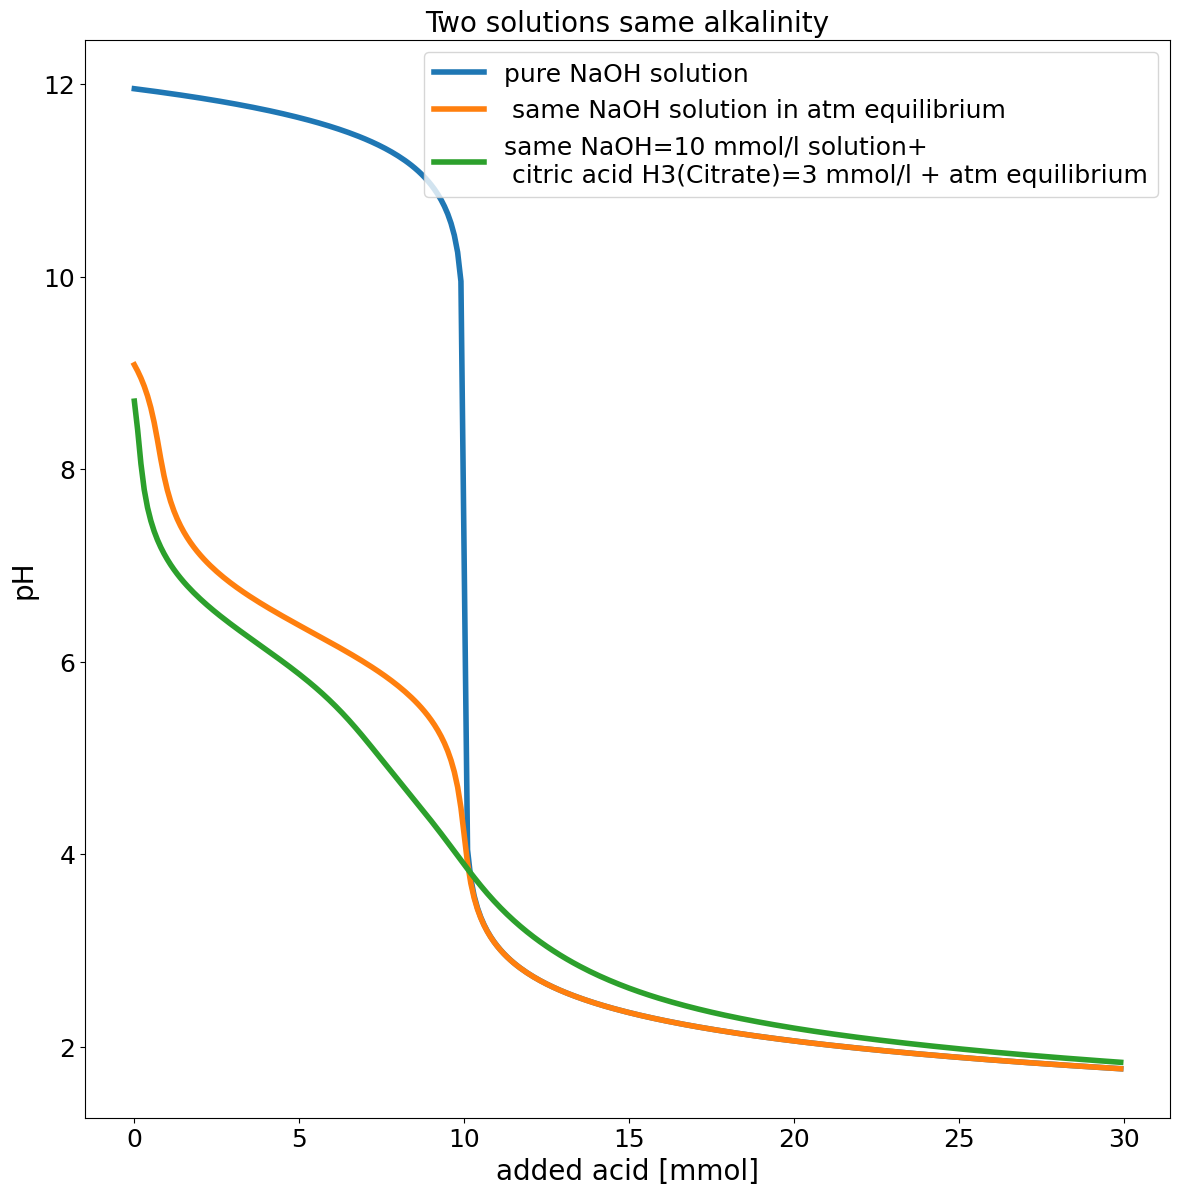

In [189]:
fig = plt.figure(figsize=[14,14])

plt.plot(acid_s2,pH_s2, label='pure NaOH solution')

plt.plot(acid_s1,pH_s1, label=' same NaOH solution in atm equilibrium')

plt.plot(acid_s3,pH_s3, label='same NaOH={:} mmol/l solution+ \n citric acid H3(Citrate)={:} mmol/l + atm equilibrium'.format(c,c_citrate)) 



plt.ylabel('pH')

plt.xlabel('added acid [mmol]')

plt.legend(loc='upper right')

plt.title('Two solutions same alkalinity')


plt.savefig('titration-plot.pdf')  

# Example of mixing two solutions

In [188]:
solution1 = pp.add_solution_simple({'NaCl':1})
solution2 = pp.add_solution_simple({'NaCl':3})
# make a solution of 50% solution 1 and 50% solution 2:
solution3 = solution1 * 0.5 + solution2 * 0.5
# make a solution by mixing solution 1 and 2 together
solution4 = solution1 + solution2